# Insurance Prediction Linear Regression Project

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [426]:
Data = pd.read_csv("/content/ML Project - Linear Regression Insurance Prediction 16955515670.csv")

In [427]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,NaN,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,NaN,no,northwest,21984.47061
4,32,male,28.880,NaN,no,northwest,3866.85520


In [428]:
Data.shape

(1338, 7)

In [429]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  764 non-null    float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [430]:
Data.isnull().sum()

age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

In [431]:
Data['children'] = Data['children'].fillna(0)

In [432]:
Data['children'] = Data['children'].astype('int64')

In [433]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [434]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


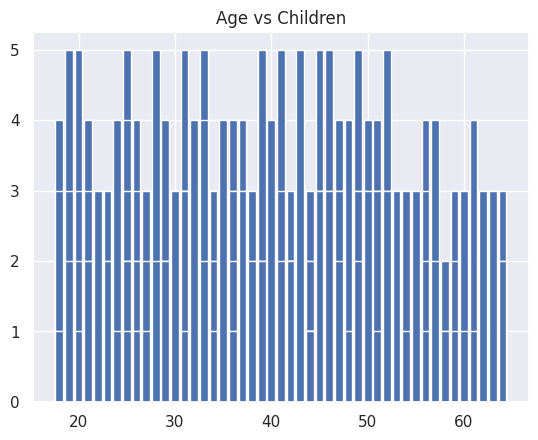

In [435]:
plt.bar(Data['age'], Data['children'], color="b")
plt.title("Age vs Children")
plt.show()

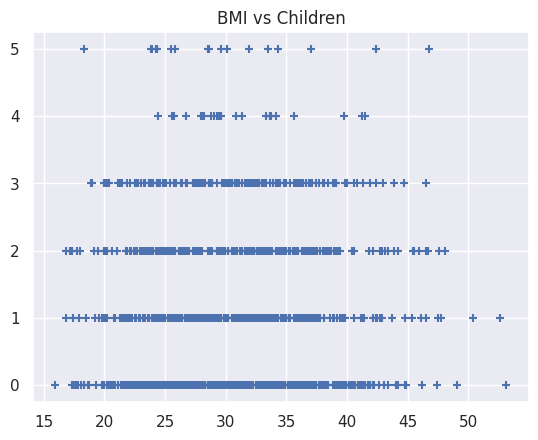

In [436]:
plt.scatter(Data['bmi'], Data['children'], color="b", marker="+")
plt.title("BMI vs Children")
plt.show()

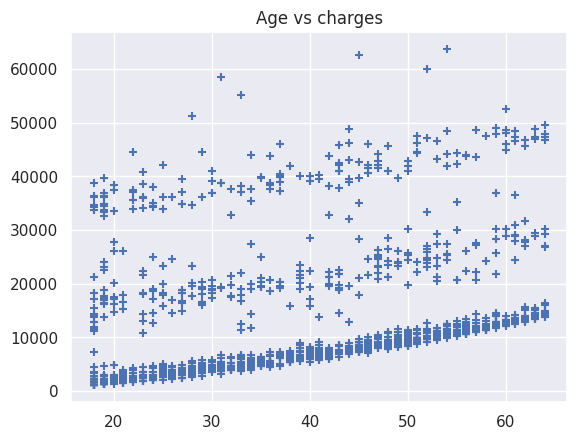

In [437]:
plt.scatter(Data['age'], Data['charges'], color="b", marker="+")
plt.title("Age vs charges")
plt.show()

In [438]:
from sklearn.preprocessing import LabelEncoder

In [439]:
LE = LabelEncoder()

In [440]:
Data['region'] = LE.fit_transform(Data['region'])
Data['sex'] = LE.fit_transform(Data['sex'])
Data['smoker'] = LE.fit_transform(Data['smoker'])

In [441]:
Data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [442]:
X = Data.drop('charges',axis=1)
Y = Data['charges']

In [443]:
from sklearn.model_selection import train_test_split

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=3100)

In [464]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [465]:
y_pred = model.predict(X_test)

In [466]:
model.score(X_train,y_train) , model.score(X_test,y_test)

(0.7327561047380526, 0.8029054030369542)

In [467]:
model.intercept_, model.coef_

(-12134.488592285083,
 array([  263.7473809 ,  -102.94200055,   340.15960759,   403.29961659,
        23543.08722106,  -377.901367  ]))

In [468]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [469]:
print("The accuracy score of model is :", np.round((r2_score(y_test,y_pred)*100),2),'%')
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

The accuracy score of model is : 80.29 %
3891.4108509584803
29190782.032706827


In [451]:
from sklearn.linear_model import Ridge

In [452]:
model1 = Ridge(alpha=1)

In [453]:
model1.fit(X_train,y_train)

Ridge(alpha=1)

In [454]:
y_pred1 = model1.predict(X_test)

In [455]:
model1.score(X_train,y_train) , model1.score(X_test,y_test)

(0.732732983228702, 0.8025254201099601)

In [456]:
print("The accuracy score of model is :", np.round((r2_score(y_test,y_pred1)*100),2),'%')
print("The Mean Absolute Error of model is :", mean_absolute_error(y_test,y_pred1))
print("The Mean Squared Error of model is:", mean_squared_error(y_test,y_pred1))

The accuracy score of model is : 80.25 %
The Mean Absolute Error of model is : 3905.575607018202
The Mean Squared Error of model is: 29247059.57135553


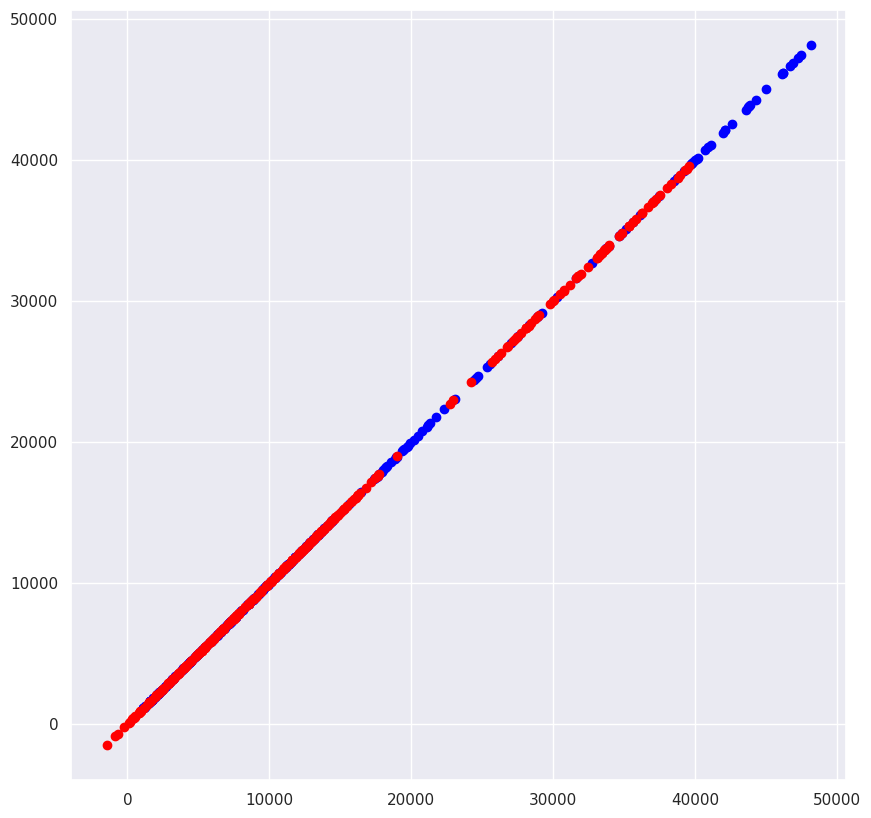

In [457]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test, color='blue')
plt.scatter( y_pred, y_pred, color='red')
plt.show()

In [458]:
Scores = []
for i in (range(0,4000,100)):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Scores.append(model.score(X_test,y_test))

In [459]:
Maximum_Accuracy = max(Scores)
print(Scores.index(Maximum_Accuracy))
Random_State_Values = range(0,4000,100)
print(Random_State_Values[31])

31
3100


In [470]:
print("The Highest accuracy score of model is :", np.round((r2_score(y_test,y_pred)*100),2),'%')

The Highest accuracy score of model is : 80.29 %
